# Data Mining - Clustering

### Names: Eli Kaustinen and Gabriel Marcelino

## Problem Statement
The objective of this assignment is to learn how to apply data mining algorithms in a Python programming environment. Specifically, the report covers:

- An explanation of three key data mining techniques: clustering, association, and correlation analysis.
- A demonstration of each technique using a real-life dataset.
- The development of two models on datasets from the UCI Machine Learning Repository (each having at least 10 attributes and 10,000 instances). One model uses K-Means clustering and the other uses association rule mining.

Each model includes steps for loading packages, pre-processing data, building the model, running predictions, and visualizing results. Additionally, the report explains the purpose of each step and provides an interpretation of the results.


## Part 1: Data Mining Techniques Overview
### Clustering
#### How It Works:
Clustering is an unsupervised learning method that groups similar data points into clusters. A popular algorithm is K-Means, which:

- Randomly initializes k centroids.
- Assigns each data point to its nearest centroid.
- Recomputes centroids as the mean of the points in each cluster.
- Iterates until the centroids no longer change significantly.

#### Strengths:
- Scalable to large datasets.
- Simple to understand and implement.

#### Weaknesses:
- Requires the number of clusters k to be specified in advance.
- Sensitive to the initial placement of centroids.
- Assumes clusters are spherical and of similar size.

### Association
#### How It Works:
Association rule mining discovers interesting relationships or co-occurrences among items in large datasets. The Apriori algorithm is a common approach:

- It identifies frequent itemsets that meet a specified support threshold.
- It then generates rules from these itemsets that satisfy confidence and lift criteria.

#### Strengths:
- Helps uncover hidden patterns between items.
- Useful in market basket analysis to optimize product placements.

#### Weaknesses:
- Computationally expensive with a large number of items.
- Can produce a very large number of rules, making interpretation difficult.

### Correlation Analysis
#### How It Works:
Correlation analysis quantifies the relationship between two continuous variables. Two common measures are:

- Pearson’s correlation coefficient: Measures linear relationships.
- Spearman’s rank correlation coefficient: Measures monotonic relationships even if they are not linear.

#### Strengths:
- Quick to compute and interpret.
- Provides a numerical value indicating the strength and direction of a relationship.

#### Weaknesses:
- Pearson’s correlation only captures linear relationships.
- Sensitive to outliers, which can distort the correlation.

### Real-life Examples


### 1. Clustering

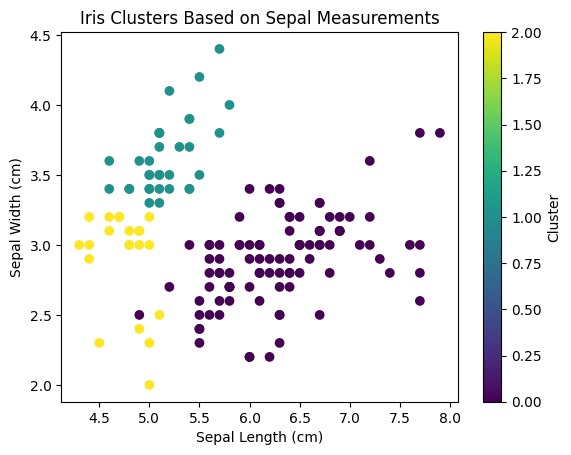


Cluster Centers (standardized):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0               0.57             -0.37               0.69              0.66
1              -0.82              1.32              -1.29             -1.22
2              -1.33             -0.37              -1.14             -1.11


In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris_scaled)

# Visualize clusters
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], 
            c=iris_df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Clusters Based on Sepal Measurements')
plt.colorbar(label='Cluster')
plt.show()

print("\nCluster Centers (standardized):")
print(pd.DataFrame(kmeans.cluster_centers_, 
                  columns=iris.feature_names).round(2))



### 2. Association Rules

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


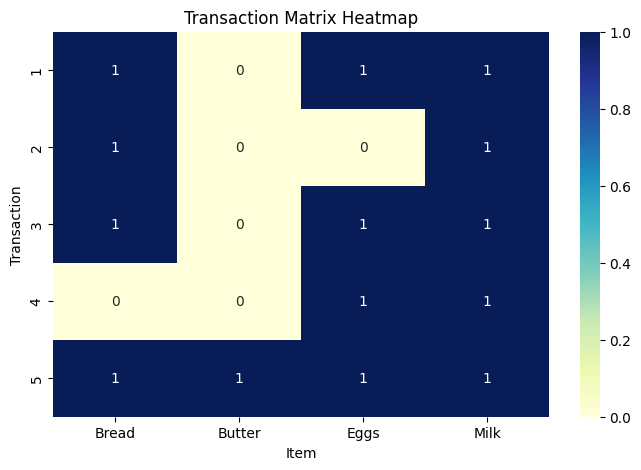


Association Rules:
      antecedents    consequents  antecedent support  consequent support  \
3         (Bread)         (Milk)                 0.8                 1.0   
5          (Eggs)         (Milk)                 0.8                 1.0   
8   (Bread, Eggs)         (Milk)                 0.6                 1.0   
2          (Milk)        (Bread)                 1.0                 0.8   
4          (Milk)         (Eggs)                 1.0                 0.8   
0          (Eggs)        (Bread)                 0.8                 0.8   
1         (Bread)         (Eggs)                 0.8                 0.8   
6    (Milk, Eggs)        (Bread)                 0.8                 0.8   
7   (Milk, Bread)         (Eggs)                 0.8                 0.8   
10         (Eggs)  (Milk, Bread)                 0.8                 0.8   
11        (Bread)   (Milk, Eggs)                 0.8                 0.8   
9          (Milk)  (Bread, Eggs)                 1.0                

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Create grocery dataset
grocery_data = {
    'Transaction': [1,1,1,2,2,3,3,3,4,4,5,5,5,5],
    'Item': ['Bread','Milk','Eggs','Bread','Milk','Bread','Eggs','Milk',
             'Milk','Eggs','Bread','Milk','Eggs','Butter']
}
grocery_df = pd.DataFrame(grocery_data)

# Create transaction matrix
transaction_matrix = pd.crosstab(grocery_df['Transaction'], grocery_df['Item'])

# Generate frequent itemsets
frequent_itemsets = apriori(transaction_matrix, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values('confidence', ascending=False)

# Heatmap of the transaction matrix
plt.figure(figsize=(8, 5))
sns.heatmap(transaction_matrix, annot=True, cmap='YlGnBu', fmt="d")
plt.title("Transaction Matrix Heatmap")
plt.show()

# Display association rules
print("\nAssociation Rules:")
print(rules.round(1))


### 3. Correlation Analysis


3. Correlation Analysis with California Housing Dataset


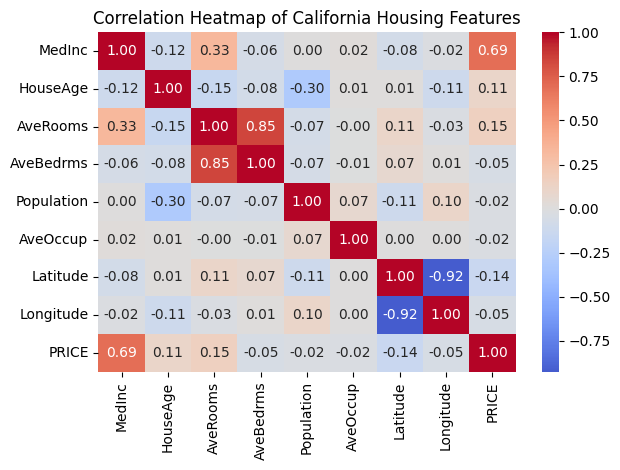


Top 5 Features Correlated with House Price:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Name: PRICE, dtype: float64


In [16]:
print("\n3. Correlation Analysis with California Housing Dataset")
# Load California Housing dataset
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target

# Calculate correlations
correlations = california_df.corr()

# Create correlation heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of California Housing Features')
plt.tight_layout()
plt.show()

# Show top 5 correlations with price
price_correlations = correlations['PRICE'].sort_values(ascending=False)
print("\nTop 5 Features Correlated with House Price:")
print(price_correlations[1:6])  # Excluding PRICE self-correlation


## Part 2: K-Means and Association Rules
### Algorithm of the Solution
1. Data Loading:
Load the necessary Python libraries and import the dataset(s) from local storage or a URL.

2. Data Pre-processing:
    - Inspect and clean the data.
    - For clustering, scale the numeric features.
    - For association rules, convert continuous variables to categorical (if needed) and one-hot encode the data.

3. Model Building:
    - K-Means Clustering: Choose the number of clusters k, run the algorithm, and assign cluster labels.
    - Association Rule Mining: Apply the Apriori algorithm to generate frequent itemsets and derive association rules.

4. Model Execution:
Run the clustering or association rule algorithm to predict clusters or extract rules from the data.

5. Result Visualization and Analysis:
    - Plot quantitative metrics and visualizations (e.g., PCA scatter plots for clustering; graph visualizations for association rules).
    - Interpret the results and adjust parameters as needed.

### Implementation in Python
#### Dataset Selection
For this assignment, two datasets from the UCI Machine Learning Repository are used:

- Forest CoverType Dataset: Contains over 580,000 instances and more than 50 attributes. This dataset is well suited for demonstrating K-Means clustering.
- Adult Dataset: Contains over 32,000 instances and 14 attributes. With some pre-processing, it can be adapted for association rule mining.

## Example 1:<br> Forest CoverType Dataset using K-Means Clustering

### 1. Import Libraries and load data

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

forest = pd.read_csv('forest_cover.csv')

### 2. Data Inspection Pre-processing

In [18]:
print(forest.info())
print(forest.describe())

# Select numeric columns for clustering (if necessary, adjust based on the dataset structure)
numeric_cols = forest.select_dtypes(include=[np.number]).columns
# Scale numeric variables to have mean=0 and std=1
scaler = StandardScaler()
forest_scaled = scaler.fit_transform(forest[numeric_cols])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

### 3. Build the K-Means Clustering Model

Cluster sizes:
 Cluster
1    228454
0    191243
4     79279
3     43807
2     38229
Name: count, dtype: int64
Within-cluster sum of squares (Inertia): 27399753.908380903


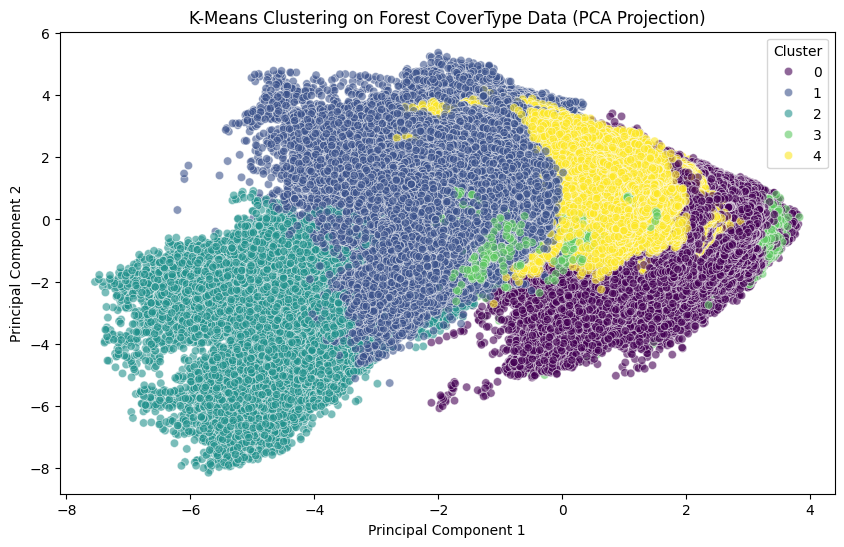

Cluster Centers (scaled):
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       0.27   -0.12  -0.09                             -0.05   
1       0.07    0.07   0.20                              0.22   
2      -2.36    0.31   1.00                             -0.40   
3      -0.53   -0.28  -0.70                             -0.15   
4       0.57    0.09  -0.46                             -0.22   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           -0.12                             0.56   
1                            0.25                            -0.26   
2                            0.28                            -1.04   
3                           -0.33                             0.25   
4                           -0.38                            -0.25   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0           0.19           -0.05          -0.16   
1          -0.12            0.02           0.08   
2        

In [23]:
# Set the number of clusters
k = 5
kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
clusters = kmeans.fit_predict(forest_scaled)
forest['Cluster'] = clusters

# Print clustering results (cluster sizes and inertia)
print("Cluster sizes:\n", forest['Cluster'].value_counts())
print("Within-cluster sum of squares (Inertia):", kmeans.inertia_)

# Visualize Clusters Using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(forest_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering on Forest CoverType Data (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
# Print out the cluster centers
print("Cluster Centers (scaled):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=numeric_cols).round(2))
# Print out the first few rows of the clustered dataset
print("\nFirst few rows of the clustered dataset:")
print(forest.head())


## Example 2:<br> Adult Dataset using Association Rule Mining

### 1. Import Libraries and load data

In [20]:
# Import necessary libraries for association rule mining
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Load the Adult dataset
adult = pd.read_csv('adult.csv', header=None, names=[
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
], na_values='?')


### 2. Data Pre-processing


In [21]:
print(adult.info())
print(adult.describe(include='all'))

# Convert the 'age' column to numeric; non-convertible values will become NaN
adult['age'] = pd.to_numeric(adult['age'], errors='coerce')

# Optionally, check for any NaN values and handle them if necessary
print(adult['age'].isnull().sum())

# Now, discretize the 'age' column into categorical groups
adult['age_group'] = pd.cut(adult['age'], bins=[0, 25, 40, 60, 100], 
                            labels=['Young', 'Adult', 'Middle', 'Senior'])

# Drop the original 'age' column (and any other numeric columns not needed)
adult_trans_df = adult.drop(columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

# Convert each row into a list of transactions (string values)
transactions = adult_trans_df.astype(str).values.tolist()

# Use TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
adult_transactions = pd.DataFrame(te_array, columns=te.columns_)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48843 non-null  object
 1   workclass       46044 non-null  object
 2   fnlwgt          48843 non-null  object
 3   education       48843 non-null  object
 4   education-num   48843 non-null  object
 5   marital-status  48843 non-null  object
 6   occupation      46034 non-null  object
 7   relationship    48843 non-null  object
 8   race            48843 non-null  object
 9   sex             48843 non-null  object
 10  capital-gain    48843 non-null  object
 11  capital-loss    48843 non-null  object
 12  hours-per-week  48843 non-null  object
 13  native-country  47986 non-null  object
 14  income          48843 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB
None
          age workclass  fnlwgt education education-num      marital-status  \
count   48843     

### 3. Build the Association Rules Model

Frequent Itemsets:
     support        itemsets
0  0.760703         (<=50K)
1  0.239277          (>50K)
2  0.114878  (Adm-clerical)
3  0.389083         (Adult)
4  0.164302     (Bachelors)
Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0     (Adult)     (<=50K)            0.389083            0.760703  0.298344   
1  (Divorced)     (<=50K)            0.135802            0.760703  0.122065   
2    (Female)     (<=50K)            0.331511            0.760703  0.295293   
3   (HS-grad)     (<=50K)            0.323158            0.760703  0.271912   
4      (Male)     (<=50K)            0.668468            0.760703  0.465410   

   confidence      lift  representativity  leverage  conviction  \
0    0.766786  1.007997               1.0  0.002367    1.026085   
1    0.898839  1.181591               1.0  0.018759    2.365513   
2    0.890749  1.170955               1.0  0.043112    2.190335   
3    0.841422  1.106111               1.0  0.0260

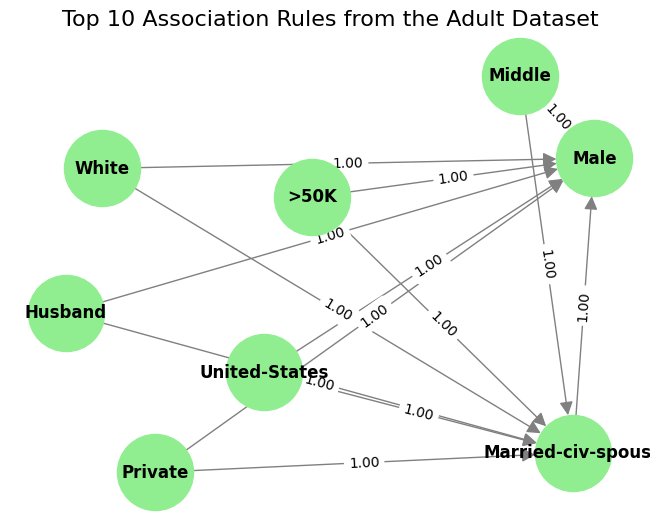

In [25]:
# Generate frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(adult_transactions, min_support=0.1, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets.head())

# Generate association rules based on the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("Association Rules:\n", rules.head())

# Visualize the Top Association Rules
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Create a network graph to visualize the rules
G = nx.DiGraph()
for _, rule in top_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    for ant in antecedents:
        for cons in consequents:
            G.add_edge(ant, cons, weight=rule['confidence'])

# Layout for better visualization
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw the network graph with enhancements
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=3000, arrowsize=20, font_size=12, font_weight='bold')

# Add edge labels for confidence
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})

plt.title('Top 10 Association Rules from the Adult Dataset', fontsize=16)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()


### Analysis of Results

#### K-Means Clustering Model Analysis:

1. **Cluster Sizes**:
   - The cluster sizes are quite imbalanced, with **Cluster 1** being the largest (228,454 samples), followed by **Cluster 0** (191,243 samples). The smallest cluster is **Cluster 2**, containing only 38,229 samples.
   - This imbalance suggests that the data might naturally form larger groups, with smaller, more specialized clusters emerging based on unique characteristics or patterns.

2. **Inertia**:
   - The **inertia value** of 27,399,753.91 suggests that the clusters are not perfectly distinct. Inertia measures the sum of squared distances from each point to its assigned cluster center, so a higher inertia value indicates that the model hasn't fully optimized the separation between clusters. There's potential for further improvement, such as fine-tuning the number of clusters or exploring other clustering methods like DBSCAN.

3. **Cluster Centers (Scaled Features)**:
   - **Cluster 0** appears relatively neutral across most features, implying that this group doesn't have any standout characteristics and may represent more general or average data points.
   - **Cluster 2** shows higher values for the **Slope** feature, which distinguishes it from other clusters. This may indicate a unique pattern tied to the terrain or geographical attributes.
   - **Cluster 4** stands out due to the emphasis on **Horizontal_Distance_To_Hydrology** and **Soil_Type**, which suggests it may represent data points with a specific environmental or physical feature, possibly linked to hydrology or soil conditions.

4. **PCA Visualization**:
   - The PCA plot reveals clear grouping of clusters, although the separation between clusters is not perfectly sharp across all dimensions. This indicates that while PCA is helpful in visualizing the data in reduced dimensions, the clustering might benefit from additional features or more sophisticated dimensionality reduction methods.

#### Association Rule Mining (Adult Dataset):

1. **Frequent Itemsets**:
   - The most frequent itemsets reveal clear trends, with the most common ones being **(<=50K)** and **(>50K)** income groups. This shows that income is a key variable in understanding the dataset.
   - Other prominent itemsets include characteristics like **(Adult)**, **(Bachelors)**, and **(Adm-clerical)**, suggesting strong associations between these attributes and income levels.

2. **Network Visualization**:
   - Strong Male Association: The graph highlights a significant association between being male, being married (civilian spouse), and having a high income (>50K).
   - Age and Income Link: The "Middle" age group is strongly linked to both males and high incomes, suggesting mid-career individuals often reach higher earning levels.
   - Private Sector Influence: Working in the private sector is associated with higher incomes (>50K), indicating potential higher compensation in this sector.

